In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [ ]:
#버전확인

print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

3.2.2
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py
/root/.config/matplotlib
/root/.cache/matplotlib


In [ ]:
#나눔 글자 설치

!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# 우선 fm._rebuild() 를 해주고
fm._rebuild()

NanumGothic Eco


In [ ]:
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
#한글 해결화할려먼 [런타임] -> [런타임 다시 시작] 해주기

1. 타이틀 : 가족이함께 떠나는 지역축제 ( 15세 이상 / 15세 미만)
2. 목적  : 가족이함께 떠나기 좋은 지역축제체험 학습 여행지 추천
3. 필터 : 여행지 선택 우선순위 / 
3-1.  지역축제 + 체험학습을 칼럼을 선택한 사람
3-2.  지역축제 + 체험학습을 고른사람중에 만족도가 있는 사람 1 / 0 분류
3-3.  여행지(시)분류, (시)별 실제 행동 분류 
3-4.  데이터프레임 및 시각화 

4. 도출 : '시' 별 어떤지역에서 어떤 행동을 해서 만족도가 높았는지 낮았는지 분류
5. 제언 : '시' 별 지역체험 만족도 균등화 및 지역활성화를 목적으로 한다.


In [ ]:
# traveler = pd.read_excel('domestic_travel.xlsx', encoding='utf-8')
traveler = pd.read_csv('domestic_travel_under15.csv', encoding='utf-8')

In [ ]:
traveler

,Unnamed: 0,ID,D_TRA1_1_SPOT1(B_여행1차_1번째방문지~N차까지존재),D_TRA1_1_SPOT2(,D_TRA1_1_SPOT3,A2_1(Q_2_여행지선택이유_1순위),A2_2,A2_3,A3_1(여행활동),A3_2,A3_3,A3_4,A3_5,A3_6,A3_7,A3_8,A3_9,A3_10,A3_11,A3_12,A3_13,A3_14,A3_15,A3_16,A3_17,A3_18,A3_19,A3_20,A3_21,A12(Q_12_전반적만족도),A13,A14,DQ2,DQ2A(만 15세 이하 가족수 척도),BAGE(연령),BMON(월별),A7B_1(가족여행),A7A(만15세미만)
0,4,11010550341_1000012,31370.0,NaN,NaN,9,1.0,4.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,4,3,1.0,4,1,1.0,1
1,16,1101057010A_1000063,32380.0,NaN,NaN,5,12.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,4,4,4,3,0.0,5,1,1.0,1
2,27,11010570431_1030426,32350.0,NaN,NaN,3,9.0,4.0,NaN,2.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,4,3,3,3,1.0,4,2,1.0,2
3,28,11010570431_1030441,32340.0,NaN,NaN,5,8.0,4.0,1.0,2.0,3.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,4,3,1.0,3,2,1.0,2
4,36,11010630251_1058771,23010.0,NaN,NaN,1,3.0,13.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,3,1,NaN,3,3,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,14042,23070611471_1359444,32030.0,NaN,NaN,4,9.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,4,3,1.0,4,12,1.0,1
1273,14048,2307061149A_1105680,11020.0,NaN,NaN,2,10.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,3,1.0,3,4,1.0,1
1274,14054,2307062008A_1136816,11240.0,NaN,NaN,4,1.0,2.0,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,4,4,2.0,3,5,1.0,2
1275,14091,2307063065A_1202031,31370.0,NaN,NaN,2,1.0,NaN,1.0,2.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,4,4,2.0,3,7,1.0,2


In [ ]:
traveler_1 = traveler.loc[:,['D_TRA1_1_SPOT1(B_여행1차_1번째방문지~N차까지존재)', 'A2_1(Q_2_여행지선택이유_1순위)', 'A2_2', 'A2_3', 
                             'A3_1(여행활동)', 'A3_11', 'A3_12', 'A12(Q_12_전반적만족도)', 'A13', 'A14', 'DQ2', 'DQ2A(만 15세 이하 가족수 척도)', 'BAGE(연령)', 'BMON(월별)', 'A7B_1(가족여행)', 'A7A(만15세미만)']]

# A7A(만15세미만)

In [ ]:
traveler_1 #필요 칼럼만 추출

,D_TRA1_1_SPOT1(B_여행1차_1번째방문지~N차까지존재),A2_1(Q_2_여행지선택이유_1순위),A2_2,A2_3,A3_1(여행활동),A3_11,A3_12,A12(Q_12_전반적만족도),A13,A14,DQ2,DQ2A(만 15세 이하 가족수 척도),BAGE(연령),BMON(월별),A7B_1(가족여행),A7A(만15세미만)
0,31370.0,9,1.0,4.0,1.0,NaN,NaN,4,4,4,3,1.0,4,1,1.0,1
1,32380.0,5,12.0,NaN,1.0,NaN,NaN,4,4,4,3,0.0,5,1,1.0,1
2,32350.0,3,9.0,4.0,NaN,NaN,NaN,4,3,3,3,1.0,4,2,1.0,2
3,32340.0,5,8.0,4.0,1.0,NaN,NaN,4,4,4,3,1.0,3,2,1.0,2
4,23010.0,1,3.0,13.0,1.0,NaN,NaN,4,3,3,1,NaN,3,3,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,32030.0,4,9.0,2.0,1.0,11.0,NaN,5,4,4,3,1.0,4,12,1.0,1
1273,11020.0,2,10.0,NaN,NaN,NaN,NaN,5,5,5,3,1.0,3,4,1.0,1
1274,11240.0,4,1.0,2.0,NaN,NaN,NaN,5,4,4,4,2.0,3,5,1.0,2
1275,31370.0,2,1.0,NaN,1.0,NaN,NaN,5,5,4,4,2.0,3,7,1.0,2


In [ ]:
traveler_1.astype(float)

,D_TRA1_1_SPOT1(B_여행1차_1번째방문지~N차까지존재),A2_1(Q_2_여행지선택이유_1순위),A2_2,A2_3,A3_1(여행활동),A3_11,A3_12,A12(Q_12_전반적만족도),A13,A14,DQ2,DQ2A(만 15세 이하 가족수 척도),BAGE(연령),BMON(월별),A7B_1(가족여행),A7A(만15세미만)
0,31370.0,9.0,1.0,4.0,1.0,NaN,NaN,4.0,4.0,4.0,3.0,1.0,4.0,1.0,1.0,1.0
1,32380.0,5.0,12.0,NaN,1.0,NaN,NaN,4.0,4.0,4.0,3.0,0.0,5.0,1.0,1.0,1.0
2,32350.0,3.0,9.0,4.0,NaN,NaN,NaN,4.0,3.0,3.0,3.0,1.0,4.0,2.0,1.0,2.0
3,32340.0,5.0,8.0,4.0,1.0,NaN,NaN,4.0,4.0,4.0,3.0,1.0,3.0,2.0,1.0,2.0
4,23010.0,1.0,3.0,13.0,1.0,NaN,NaN,4.0,3.0,3.0,1.0,NaN,3.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,32030.0,4.0,9.0,2.0,1.0,11.0,NaN,5.0,4.0,4.0,3.0,1.0,4.0,12.0,1.0,1.0
1273,11020.0,2.0,10.0,NaN,NaN,NaN,NaN,5.0,5.0,5.0,3.0,1.0,3.0,4.0,1.0,1.0
1274,11240.0,4.0,1.0,2.0,NaN,NaN,NaN,5.0,4.0,4.0,4.0,2.0,3.0,5.0,1.0,2.0
1275,31370.0,2.0,1.0,NaN,1.0,NaN,NaN,5.0,5.0,4.0,4.0,2.0,3.0,7.0,1.0,2.0


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
traveler_2 = traveler_1.rename({'D_TRA1_1_SPOT1(B_여행1차_1번째방문지~N차까지존재)' : '1차방문지' , 'A2_1(Q_2_여행지선택이유_1순위)' : '여행지선택이유__1순위', 'A2_2' : '여행지선택이유_2순위', 'A2_3' : '여행지선택이유_3순위', 'A3_1(여행활동)' : '여행활동'
, 'A3_11' : '여행활동_11.지역 축제_이벤트 참가', 'A3_12' : '여행활동_12.교육_체험 프로그램 참가', 'A12(Q_12_전반적만족도)' : '전반적만족도', 'A13' : '재방문의도', 'A14' : '타인추천의도', 'DQ2' : '가족수',
'DQ2A(만 15세 이하 가족수 척도)' : '15세이하 가족수', 'A7A(만15세미만)' : '만15세가족'}, axis='columns')

# A7A(만15세미만) : 만15세 이하y

In [ ]:
# traveler_1['여행활동_11.지역 축제_이벤트 참가']

In [ ]:
print(traveler_2.dtypes)

1차방문지                    float64
여행지선택이유__1순위               int64
여행지선택이유_2순위              float64
여행지선택이유_3순위              float64
여행활동                     float64
여행활동_11.지역 축제_이벤트 참가     float64
여행활동_12.교육_체험 프로그램 참가    float64
전반적만족도                     int64
재방문의도                      int64
타인추천의도                     int64
가족수                        int64
15세이하 가족수                float64
BAGE(연령)                   int64
BMON(월별)                   int64
A7B_1(가족여행)              float64
만15세가족                     int64
dtype: object


In [ ]:
traveler_2

,1차방문지,여행지선택이유__1순위,여행지선택이유_2순위,여행지선택이유_3순위,여행활동,여행활동_11.지역 축제_이벤트 참가,여행활동_12.교육_체험 프로그램 참가,전반적만족도,재방문의도,타인추천의도,가족수,15세이하 가족수,BAGE(연령),BMON(월별),A7B_1(가족여행),만15세가족
0,31370.0,9,1.0,4.0,1.0,NaN,NaN,4,4,4,3,1.0,4,1,1.0,1
1,32380.0,5,12.0,NaN,1.0,NaN,NaN,4,4,4,3,0.0,5,1,1.0,1
2,32350.0,3,9.0,4.0,NaN,NaN,NaN,4,3,3,3,1.0,4,2,1.0,2
3,32340.0,5,8.0,4.0,1.0,NaN,NaN,4,4,4,3,1.0,3,2,1.0,2
4,23010.0,1,3.0,13.0,1.0,NaN,NaN,4,3,3,1,NaN,3,3,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,32030.0,4,9.0,2.0,1.0,11.0,NaN,5,4,4,3,1.0,4,12,1.0,1
1273,11020.0,2,10.0,NaN,NaN,NaN,NaN,5,5,5,3,1.0,3,4,1.0,1
1274,11240.0,4,1.0,2.0,NaN,NaN,NaN,5,4,4,4,2.0,3,5,1.0,2
1275,31370.0,2,1.0,NaN,1.0,NaN,NaN,5,5,4,4,2.0,3,7,1.0,2


In [ ]:
print(traveler_2['1차방문지'][0])

31370.0


In [ ]:
#지역별 Category 화

for x in range(0, len(traveler_2['1차방문지'])) :
  if 11000 <= traveler_2['1차방문지'][x] < 12000:
    traveler_2['1차방문지'][x] = '서울'
  elif 21000 <= traveler_2['1차방문지'][x] < 22000:
    traveler_2['1차방문지'][x] = '부산'
  elif 22000 <= traveler_2['1차방문지'][x] < 23000:
    traveler_2['1차방문지'][x] = '대구'
  elif 23000 <= traveler_2['1차방문지'][x] < 24000:
    traveler_2['1차방문지'][x] = '인천'
  elif 24000 <= traveler_2['1차방문지'][x] < 25000:
    traveler_2['1차방문지'][x] = '광주'
  elif 25000 <= traveler_2['1차방문지'][x] < 26000:
    traveler_2['1차방문지'][x] = '대전'
  elif 26000 <= traveler_2['1차방문지'][x] < 27000:
    traveler_2['1차방문지'][x] = '울산'
  elif traveler_2['1차방문지'][x] == 29010:
    traveler_2['1차방문지'][x] = '세종'
  elif 31000 <= traveler_2['1차방문지'][x] < 32000:
    traveler_2['1차방문지'][x] = '경기도'
  elif 32000 <= traveler_2['1차방문지'][x] < 33000:
    traveler_2['1차방문지'][x] = '강원도'
  elif 33000 <= traveler_2['1차방문지'][x] < 34000:
    traveler_2['1차방문지'][x] = '충청북도'
  elif 34000 <= traveler_2['1차방문지'][x] < 35000:
    traveler_2['1차방문지'][x] = '충청남도'
  elif 35000 <= traveler_2['1차방문지'][x] < 36000:
    traveler_2['1차방문지'][x] = '전라북도'
  elif 36000 <= traveler_2['1차방문지'][x] < 37000:
    traveler_2['1차방문지'][x] = '전라남도'  
  elif 37000 <= traveler_2['1차방문지'][x] < 38000:
    traveler_2['1차방문지'][x] = '경상북도'
  elif 38000 <= traveler_2['1차방문지'][x] < 39000:
    traveler_2['1차방문지'][x] = '경상남도'
  elif 39000 <= traveler_2['1차방문지'][x] < 40000:
    traveler_2['1차방문지'][x] = '제주도'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11:

In [ ]:
for x in traveler_2['1차방문지']:
  print(x)

경기도
강원도
강원도
강원도
인천
강원도
강원도
강원도
전라북도
제주도
경기도
경기도
경기도
경기도
경기도
경기도
강원도
강원도
경상남도
강원도
강원도
충청북도
강원도
강원도
강원도
인천
경기도
경상북도
경기도
경상북도
인천
전라남도
강원도
전라남도
경기도
강원도
경기도
경기도
경기도
경상남도
경상북도
인천
강원도
강원도
전라남도
경기도
강원도
경기도
전라남도
부산
강원도
경기도
전라북도
경기도
강원도
부산
강원도
강원도
경기도
경기도
경기도
경상북도
충청북도
경기도
강원도
경기도
강원도
경기도
경기도
강원도
강원도
제주도
경기도
경기도
경기도
강원도
경기도
경기도
경기도
경기도
경기도
강원도
전라북도
경상북도
경기도
경기도
충청북도
충청남도
전라북도
강원도
경상남도
강원도
전라북도
경기도
충청북도
강원도
부산
강원도
경기도
경기도
경기도
강원도
전라북도
충청북도
강원도
경기도
경기도
경기도
충청북도
경기도
경기도
경기도
강원도
강원도
강원도
강원도
충청남도
인천
인천
경기도
부산
대전
경기도
경기도
경기도
강원도
경기도
경기도
충청남도
충청남도
강원도
전라남도
경기도
강원도
강원도
부산
제주도
충청남도
충청남도
인천
경기도
강원도
경기도
충청남도
경기도
경기도
인천
경기도
경기도
인천
강원도
경기도
강원도
경기도
인천
강원도
경기도
강원도
경기도
경기도
강원도
충청남도
충청남도
강원도
경기도
강원도
경기도
경기도
경상북도
강원도
충청북도
경기도
경기도
전라북도
경기도
경기도
경기도
강원도
경기도
강원도
경기도
강원도
강원도
경기도
전라남도
경기도
전라북도
강원도
경기도
충청북도
경기도
충청북도
강원도
강원도
강원도
경기도
경기도
강원도
부산
경기도
광주
충청남도
강원도
경상남도
강원도
충청북도
강원도
경기도
강원도
강원도
강원도
경상남도
강원도
제주도
전라남도
경기도
경상북도
충청남도
인천
경기도
충청남도
강원도
충청남도
강원도
경기도
경기도
충청북도
인천
충청남도
경상북도
충청남도
강원도
강원도
광주
전라북도
강원도
인천
강원도
충청남도
경상남도
강원도
경

In [ ]:
traveler_2_count_place = traveler_2.groupby('1차방문지')
traveler_2_count_place

In [ ]:
traveler_2_count_place['1차방문지'].value_counts()

1차방문지  1차방문지
강원도    강원도      206
경기도    경기도      265
경상남도   경상남도     173
경상북도   경상북도     218
광주     광주         7
대구     대구         9
대전     대전        12
부산     부산        40
서울     서울        26
세종     세종         1
울산     울산        33
인천     인천        39
전라남도   전라남도      54
전라북도   전라북도      47
제주도    제주도       36
충청남도   충청남도      75
충청북도   충청북도      31
Name: 1차방문지, dtype: int64

In [ ]:
count_first = traveler_2['1차방문지'].value_counts()
count_first

경기도     265
경상북도    218
강원도     206
경상남도    173
충청남도     75
전라남도     54
전라북도     47
부산       40
인천       39
제주도      36
울산       33
충청북도     31
서울       26
대전       12
대구        9
광주        7
세종        1
Name: 1차방문지, dtype: int64

In [ ]:
#지역별 1차 방문지 정리 -> 지역별로 응답자들이 해당지역을 방문함

In [ ]:
count_place = traveler_2_count_place.count().sort_values(['1차방문지'],ascending=False)
count_place
#count place는 '지역' 별  선이유 및, 활동등을 카운트한것

,여행지선택이유__1순위,여행지선택이유_2순위,여행지선택이유_3순위,여행활동,여행활동_11.지역 축제_이벤트 참가,여행활동_12.교육_체험 프로그램 참가,전반적만족도,재방문의도,타인추천의도,가족수,15세이하 가족수,BAGE(연령),BMON(월별),A7B_1(가족여행),만15세가족
1차방문지,,,,,,,,,,,,,,,
충청북도,31,29,23,23,0,1,31,31,31,31,30,31,31,30,31
충청남도,75,73,53,59,5,1,75,75,75,75,73,75,75,73,75
제주도,36,32,29,32,2,2,36,36,36,36,35,36,36,36,36
전라북도,47,46,35,41,4,3,47,47,47,47,44,47,47,46,47
전라남도,54,54,40,44,4,1,54,54,54,54,52,54,54,52,54
인천,39,39,30,35,0,1,39,39,39,39,36,39,39,38,39
울산,33,31,23,26,1,2,33,33,33,33,32,33,33,32,33
세종,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1
서울,26,22,17,12,2,1,26,26,26,26,25,26,26,25,26


In [ ]:
gu = count_place['여행지선택이유__1순위']
gu

1차방문지
충청북도     31
충청남도     75
제주도      36
전라북도     47
전라남도     54
인천       39
울산       33
세종        1
서울       26
부산       40
대전       12
대구        9
광주        7
경상북도    218
경상남도    173
경기도     265
강원도     206
Name: 여행지선택이유__1순위, dtype: int64

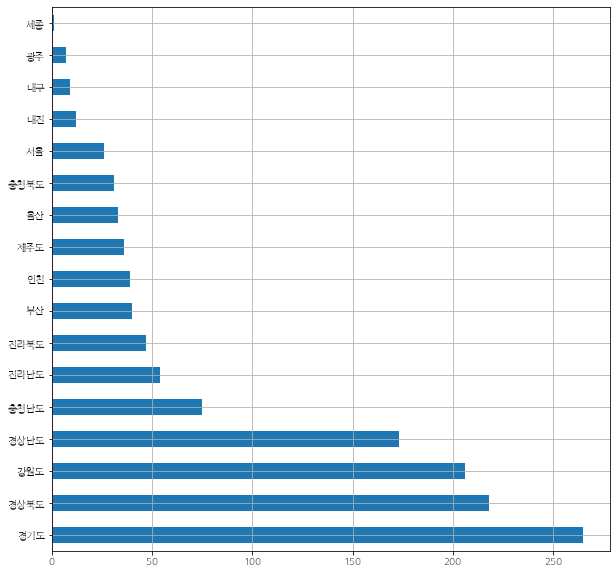

In [ ]:
plt.figure()

#barh 는 가로 -> horizontal 수치를 수평적으로 바꾼 그래프임
#'구'를 위에서 인덱스로 바꿨기 때문에, 자동으로 인덱스를 '구'로 잡아 누운(x,y) 가 뒤바뀐 그래프로 그립니다.
# count_place['1차방문지'].plot(kind='barh', grid=True, figsize=(10,10))
count_first.plot(kind='barh', grid=True, figsize=(10,10))

plt.show()

** **

** 만 15세 미만의 자녀를 가진, 가족이 가장 많이 방문하는 여행지는 **
** 1. 경기도**
** 2. 경상북도 **
** 3. 강원도 **
** 4. 경상남도 순이다**

# 지역축제/체험을 선택한 사람들과 실제 체험한 사람들의 차이

In [ ]:
traveler_2

,1차방문지,여행지선택이유__1순위,여행지선택이유_2순위,여행지선택이유_3순위,여행활동,여행활동_11.지역 축제_이벤트 참가,여행활동_12.교육_체험 프로그램 참가,전반적만족도,재방문의도,타인추천의도,가족수,15세이하 가족수,BAGE(연령),BMON(월별),A7B_1(가족여행),만15세가족
0,경기도,9,1.0,4.0,1.0,NaN,NaN,4,4,4,3,1.0,4,1,1.0,1
1,강원도,5,12.0,NaN,1.0,NaN,NaN,4,4,4,3,0.0,5,1,1.0,1
2,강원도,3,9.0,4.0,NaN,NaN,NaN,4,3,3,3,1.0,4,2,1.0,2
3,강원도,5,8.0,4.0,1.0,NaN,NaN,4,4,4,3,1.0,3,2,1.0,2
4,인천,1,3.0,13.0,1.0,NaN,NaN,4,3,3,1,NaN,3,3,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,강원도,4,9.0,2.0,1.0,11.0,NaN,5,4,4,3,1.0,4,12,1.0,1
1273,서울,2,10.0,NaN,NaN,NaN,NaN,5,5,5,3,1.0,3,4,1.0,1
1274,서울,4,1.0,2.0,NaN,NaN,NaN,5,4,4,4,2.0,3,5,1.0,2
1275,경기도,2,1.0,NaN,1.0,NaN,NaN,5,5,4,4,2.0,3,7,1.0,2


In [ ]:
#여행 선택이유 1,2,3 순위가 11/12번인 사람들 = 지역축제/체험을 하기 위해 여행을 떠난 사람들

want_1 = traveler_2['여행지선택이유__1순위'] == 11
want_11 = traveler_2['여행지선택이유__1순위'] == 12
want_2 = traveler_2['여행지선택이유_2순위'] == 11
want_22 = traveler_2['여행지선택이유__1순위'] == 12
want_3 = traveler_2['여행지선택이유_3순위'] == 11
want_33 = traveler_2['여행지선택이유__1순위'] == 12

want_11_12 = traveler_2[want_1 | want_2 | want_3 | want_11 | want_22 | want_33]



In [ ]:
want_11_12
#지역체험 축제 여행을 가고 싶었던 사람은 207명
#그 중 실제로 11,12(지역축제 및 체험학습) 간 사람들의 명 수 파악

,1차방문지,여행지선택이유__1순위,여행지선택이유_2순위,여행지선택이유_3순위,여행활동,여행활동_11.지역 축제_이벤트 참가,여행활동_12.교육_체험 프로그램 참가,전반적만족도,재방문의도,타인추천의도,가족수,15세이하 가족수,BAGE(연령),BMON(월별),A7B_1(가족여행),만15세가족
17,강원도,1,2.0,11.0,1.0,NaN,NaN,4,4,3,5,0.0,1,5,1.0,1
37,경기도,11,5.0,3.0,1.0,NaN,NaN,4,3,3,4,2.0,4,4,1.0,2
43,강원도,1,11.0,NaN,1.0,NaN,NaN,4,4,4,4,2.0,3,7,1.0,2
48,전라남도,12,1.0,8.0,1.0,NaN,NaN,4,4,4,3,1.0,3,6,1.0,1
57,강원도,2,12.0,11.0,1.0,NaN,NaN,4,3,3,4,0.0,3,2,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,대전,1,11.0,4.0,1.0,NaN,NaN,4,4,4,4,2.0,4,2,1.0,2
1244,강원도,8,11.0,5.0,1.0,NaN,NaN,4,4,4,3,1.0,3,8,1.0,1
1251,서울,11,2.0,8.0,NaN,11.0,NaN,4,4,4,4,2.0,4,12,1.0,2
1256,충청남도,12,8.0,5.0,1.0,NaN,NaN,4,5,4,3,1.0,3,2,1.0,1


In [ ]:
ele = want_11_12['여행활동_11.지역 축제_이벤트 참가'] == 11
twel = want_11_12['여행활동_12.교육_체험 프로그램 참가'] == 12

real_want = want_11_12[ele | twel]

In [ ]:
real_want

,1차방문지,여행지선택이유__1순위,여행지선택이유_2순위,여행지선택이유_3순위,여행활동,여행활동_11.지역 축제_이벤트 참가,여행활동_12.교육_체험 프로그램 참가,전반적만족도,재방문의도,타인추천의도,가족수,15세이하 가족수,BAGE(연령),BMON(월별),A7B_1(가족여행),만15세가족
162,충청남도,12,4.0,14.0,1.0,11.0,NaN,4,4,3,4,2.0,3,10,1.0,2
257,경기도,12,10.0,2.0,NaN,11.0,NaN,4,4,4,4,2.0,4,12,1.0,2
451,충청남도,12,8.0,5.0,NaN,11.0,NaN,4,4,4,3,1.0,3,4,1.0,1
660,경상북도,11,4.0,14.0,1.0,NaN,12.0,4,4,4,3,1.0,3,8,1.0,1
700,경상남도,4,14.0,11.0,1.0,11.0,NaN,4,3,2,4,2.0,4,5,1.0,2
843,경상북도,7,11.0,1.0,1.0,11.0,NaN,4,4,4,3,1.0,4,11,1.0,1
844,경상북도,1,11.0,9.0,NaN,11.0,NaN,4,5,4,3,1.0,4,7,1.0,1
951,경상북도,11,1.0,2.0,1.0,11.0,NaN,4,4,4,5,3.0,4,3,1.0,4
1127,경기도,8,4.0,11.0,NaN,NaN,12.0,4,4,4,4,2.0,3,1,1.0,2
1133,전라북도,12,2.0,1.0,1.0,11.0,NaN,4,4,4,4,2.0,4,4,1.0,2


In [ ]:
want_gu = want_11_12['1차방문지']
want_gu

17       강원도
37       경기도
43       강원도
48      전라남도
57       강원도
        ... 
1236      대전
1244     강원도
1251      서울
1256    충청남도
1265    경상남도
Name: 1차방문지, Length: 207, dtype: object

In [ ]:
wa = want_gu.value_counts()
wa

경기도     37
경상북도    30
강원도     28
경상남도    26
충청남도    17
전라남도    12
인천      10
제주도      9
전라북도     9
부산       6
서울       5
울산       5
대구       4
충청북도     4
광주       2
대전       2
Name: 1차방문지, dtype: int64

In [ ]:
really = real_want['1차방문지'].value_counts()
really
#지역체험/축제를 가기로 했으나, 실제로 지역/축제 체험한 사람들은 11명
#지역체험/축제를 목표로 한 사람들은 207 명
#그 간의 격차가 벌어짐

경상북도    4
충청남도    2
경기도     2
서울      1
경상남도    1
전라북도    1
Name: 1차방문지, dtype: int64

In [ ]:
#시각화하기
#1. 지역/축제 체험을 목표로 한 사람들 : 207명
#2. 지역/축제 체험을 목표로 한 사람들 중에 실제로 간 사람들(11명) 의 그래프를 비교하여 / 실제로 지역/축제 체험을 계획했어도, 체험하기는 쉽지 않다는 것을 설명
#그렇다면 그 이유는 무엇일까? -> 관광지 데이터를 통해 지역별 체험/축제 관광지 개수를 설명

In [ ]:
wa_pd = pd.DataFrame(wa)
wa_pd
wa_pd.reset_index(drop=False, inplace=True)
wa_pd

,index,1차방문지
0,경기도,37
1,경상북도,30
2,강원도,28
3,경상남도,26
4,충청남도,17
5,전라남도,12
6,인천,10
7,제주도,9
8,전라북도,9
9,부산,6


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

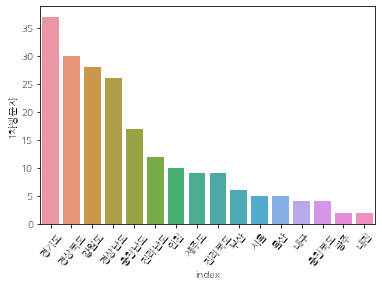

In [ ]:
a = wa_pd
sns.barplot('index', '1차방문지' , data=a)
plt.xticks(rotation=50)

In [ ]:
really
really_pd = pd.DataFrame(really)
really_pd.reset_index(drop=False, inplace=True)
really_pd

,index,1차방문지
0,경상북도,4
1,충청남도,2
2,경기도,2
3,서울,1
4,경상남도,1
5,전라북도,1


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

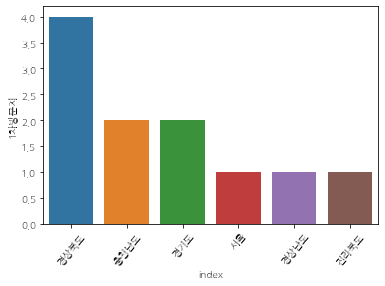

In [ ]:
b = really_pd
sns.barplot('index', '1차방문지' , data=b)
plt.xticks(rotation=50)

**설명 : 지역 체험/축제를 목표로 여행을 떠난 사람들은 207명, 그러나 실제 체험한 총 인원은 11명.**

**그 이유는 무엇일까?!**
**그 이유를 알기 위해서, 여행객 데이터를 가져온다.**

# 지역축제/체험을 선택한 사람들의 지역별 만족도

In [ ]:
#지역별로 분류만 해놓음. 

traveler_2

,1차방문지,여행지선택이유__1순위,여행지선택이유_2순위,여행지선택이유_3순위,여행활동,여행활동_11.지역 축제_이벤트 참가,여행활동_12.교육_체험 프로그램 참가,전반적만족도,재방문의도,타인추천의도,가족수,15세이하 가족수,BAGE(연령),BMON(월별),A7B_1(가족여행),만15세가족
0,경기도,9,1.0,4.0,1.0,NaN,NaN,4,4,4,3,1.0,4,1,1.0,1
1,강원도,5,12.0,NaN,1.0,NaN,NaN,4,4,4,3,0.0,5,1,1.0,1
2,강원도,3,9.0,4.0,NaN,NaN,NaN,4,3,3,3,1.0,4,2,1.0,2
3,강원도,5,8.0,4.0,1.0,NaN,NaN,4,4,4,3,1.0,3,2,1.0,2
4,인천,1,3.0,13.0,1.0,NaN,NaN,4,3,3,1,NaN,3,3,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,강원도,4,9.0,2.0,1.0,11.0,NaN,5,4,4,3,1.0,4,12,1.0,1
1273,서울,2,10.0,NaN,NaN,NaN,NaN,5,5,5,3,1.0,3,4,1.0,1
1274,서울,4,1.0,2.0,NaN,NaN,NaN,5,4,4,4,2.0,3,5,1.0,2
1275,경기도,2,1.0,NaN,1.0,NaN,NaN,5,5,4,4,2.0,3,7,1.0,2


In [ ]:
t = traveler_2['여행활동_11.지역 축제_이벤트 참가'] == 11
t2 = traveler_2['여행활동_12.교육_체험 프로그램 참가'] == 12

subset_df = traveler_2[t | t2]

# 만 15세 가족 이하 에서 -> 11 또는 12를 선택한 애들만 출력
subset_df


,1차방문지,여행지선택이유__1순위,여행지선택이유_2순위,여행지선택이유_3순위,여행활동,여행활동_11.지역 축제_이벤트 참가,여행활동_12.교육_체험 프로그램 참가,전반적만족도,재방문의도,타인추천의도,가족수,15세이하 가족수,BAGE(연령),BMON(월별),A7B_1(가족여행),만15세가족
13,경기도,4,1.0,5.0,NaN,11.0,NaN,4,4,3,4,2.0,3,10,1.0,2
36,경기도,10,14.0,4.0,1.0,NaN,12.0,5,4,4,3,1.0,3,3,1.0,1
49,부산,9,6.0,10.0,NaN,11.0,NaN,4,4,4,4,2.0,3,7,1.0,2
78,경기도,1,5.0,4.0,1.0,NaN,12.0,4,4,4,3,1.0,3,6,1.0,1
82,전라북도,1,12.0,2.0,NaN,NaN,12.0,3,3,3,4,0.0,5,2,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,서울,11,2.0,8.0,NaN,11.0,NaN,4,4,4,4,2.0,4,12,1.0,2
1258,경기도,8,5.0,10.0,NaN,11.0,NaN,4,4,4,3,1.0,4,2,1.0,1
1260,경기도,13,2.0,5.0,NaN,NaN,12.0,4,4,4,4,2.0,3,5,1.0,2
1262,강원도,5,6.0,2.0,1.0,NaN,12.0,4,5,4,2,0.0,7,7,1.0,2


In [ ]:


# tdata = traveler_2['여행활동_11.지역 축제_이벤트 참가'] != 11
# tdata_2 = traveler_2['여행활동_11.지역 축제_이벤트 참가'] != 12

# subset_df = traveler_2[tdata & tdata_2]

# subset_df

,1차방문지,여행지선택이유__1순위,여행지선택이유_2순위,여행지선택이유_3순위,여행활동,여행활동_11.지역 축제_이벤트 참가,여행활동_12.교육_체험 프로그램 참가,전반적만족도,재방문의도,타인추천의도,가족수,15세이하 가족수,BAGE(연령),BMON(월별),A7B_1(가족여행),만15세가족
0,경기도,9,1.0,4.0,1.0,NaN,NaN,4,4,4,3,1.0,4,1,1.0,1
1,강원도,5,12.0,NaN,1.0,NaN,NaN,4,4,4,3,0.0,5,1,1.0,1
2,강원도,3,9.0,4.0,NaN,NaN,NaN,4,3,3,3,1.0,4,2,1.0,2
3,강원도,5,8.0,4.0,1.0,NaN,NaN,4,4,4,3,1.0,3,2,1.0,2
4,인천,1,3.0,13.0,1.0,NaN,NaN,4,3,3,1,NaN,3,3,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,경기도,1,3.0,2.0,1.0,NaN,NaN,4,4,4,4,2.0,4,12,1.0,2
1273,서울,2,10.0,NaN,NaN,NaN,NaN,5,5,5,3,1.0,3,4,1.0,1
1274,서울,4,1.0,2.0,NaN,NaN,NaN,5,4,4,4,2.0,3,5,1.0,2
1275,경기도,2,1.0,NaN,1.0,NaN,NaN,5,5,4,4,2.0,3,7,1.0,2


In [ ]:
#만족도의 수치화를 구함. 
#ex) 전반적+재방문+타인추천을 합쳐 -> 새로운 칼럼의 수치화를 만들어놓음
#ex) 추천의향이 없으면 -> 알아서 분류되겠지?

test = subset_df['전반적만족도'] + subset_df['재방문의도'] + subset_df['타인추천의도']
test

13      11
36      13
49      12
78      12
82       9
        ..
1251    12
1258    12
1260    12
1262    13
1272    13
Length: 107, dtype: int64

In [ ]:
subset_df['total_satis'] = test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
subset_df

,1차방문지,여행지선택이유__1순위,여행지선택이유_2순위,여행지선택이유_3순위,여행활동,여행활동_11.지역 축제_이벤트 참가,여행활동_12.교육_체험 프로그램 참가,전반적만족도,재방문의도,타인추천의도,가족수,15세이하 가족수,BAGE(연령),BMON(월별),A7B_1(가족여행),만15세가족,total_satis
13,경기도,4,1.0,5.0,NaN,11.0,NaN,4,4,3,4,2.0,3,10,1.0,2,11
36,경기도,10,14.0,4.0,1.0,NaN,12.0,5,4,4,3,1.0,3,3,1.0,1,13
49,부산,9,6.0,10.0,NaN,11.0,NaN,4,4,4,4,2.0,3,7,1.0,2,12
78,경기도,1,5.0,4.0,1.0,NaN,12.0,4,4,4,3,1.0,3,6,1.0,1,12
82,전라북도,1,12.0,2.0,NaN,NaN,12.0,3,3,3,4,0.0,5,2,1.0,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,서울,11,2.0,8.0,NaN,11.0,NaN,4,4,4,4,2.0,4,12,1.0,2,12
1258,경기도,8,5.0,10.0,NaN,11.0,NaN,4,4,4,3,1.0,4,2,1.0,1,12
1260,경기도,13,2.0,5.0,NaN,NaN,12.0,4,4,4,4,2.0,3,5,1.0,2,12
1262,강원도,5,6.0,2.0,1.0,NaN,12.0,4,5,4,2,0.0,7,7,1.0,2,13


In [ ]:
select_subet = subset_df.loc[:,['1차방문지', '여행지선택이유__1순위', 'total_satis']]

In [ ]:
select_subet

,1차방문지,여행지선택이유__1순위,total_satis
13,경기도,4,11
36,경기도,10,13
49,부산,9,12
78,경기도,1,12
82,전라북도,1,9
...,...,...,...
1251,서울,11,12
1258,경기도,8,12
1260,경기도,13,12
1262,강원도,5,13


In [ ]:
select_group = select_subet.groupby('1차방문지')

#퍼센트지로 해줘야해, 

In [ ]:
select_subet = select_subet.groupby(['1차방문지']).agg({'total_satis' : 'sum'}).sort_values(['total_satis'],ascending=False)
# 그룹별 satisfy 합산

#df.groupby(['col1', 'col2']).agg({'col3':'sum','col4':'sum'})


In [ ]:
select_subet

,total_satis
1차방문지,
경기도,301
경상북도,221
강원도,207
경상남도,151
전라북도,82
충청남도,70
전라남도,60
제주도,54
울산,39


<Figure size 432x288 with 0 Axes>

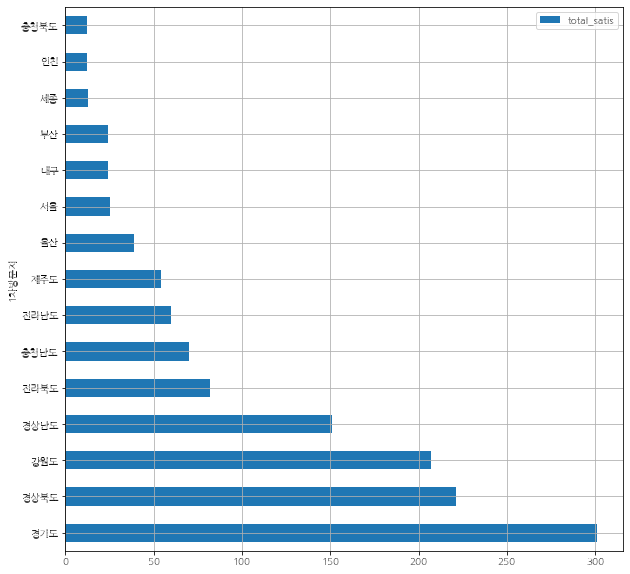

In [ ]:
plt.figure()

#barh 는 가로 -> horizontal 수치를 수평적으로 바꾼 그래프임
#'구'를 위에서 인덱스로 바꿨기 때문에, 자동으로 인덱스를 '구'로 잡아 누운(x,y) 가 뒤바뀐 그래프로 그립니다.
select_subet.plot(kind='barh', grid=True, figsize=(10,10))

plt.show()

In [ ]:
#위에거는 만족도가 가장 높은것이고, 해야할 작업은 만족도 + 구 별 관광객수를 골라, 퍼센티지로

In [ ]:
select_subet.reset_index(drop=False,inplace=True)

In [ ]:
select_subet

,1차방문지,total_satis
0,경기도,301
1,경상북도,221
2,강원도,207
3,경상남도,151
4,전라북도,82
5,충청남도,70
6,전라남도,60
7,제주도,54
8,울산,39
9,서울,25


In [ ]:
second = subset_df['1차방문지'].value_counts()
second

경기도     25
경상북도    18
강원도     17
경상남도    13
전라북도     7
충청남도     6
전라남도     5
제주도      4
울산       3
대구       2
서울       2
부산       2
세종       1
인천       1
충청북도     1
Name: 1차방문지, dtype: int64

In [ ]:
first = second.sort_values()

In [ ]:
first

세종       1
인천       1
충청북도     1
대구       2
서울       2
부산       2
울산       3
제주도      4
전라남도     5
충청남도     6
전라북도     7
경상남도    13
강원도     17
경상북도    18
경기도     25
Name: 1차방문지, dtype: int64

In [ ]:
from pandas import DataFrame as df

In [ ]:
# df(data=count_first.index() : [count_first.index()]}, columns='이름')

In [ ]:
gugu = pd.DataFrame(first)
gugu = gugu.rename({'1차방문지' : '응답자수'}, axis='columns')
gugu

,응답자수
세종,1
인천,1
충청북도,1
대구,2
서울,2
부산,2
울산,3
제주도,4
전라남도,5
충청남도,6


In [ ]:
gugu.reset_index(drop=False, inplace=True)
gugu

,index,응답자수
0,세종,1
1,인천,1
2,충청북도,1
3,대구,2
4,서울,2
5,부산,2
6,울산,3
7,제주도,4
8,전라남도,5
9,충청남도,6


In [ ]:
gugu.rename(columns={'index' : '1차방문지'}, inplace=True)

In [ ]:
gugu
# # # gugu.drop(['1차방문지'], axis='columns', inplace=False)
# # gugu.reset_index(drop=True,inplace=False)
# gugu.drop('level_0')

,1차방문지,응답자수
0,세종,1
1,인천,1
2,충청북도,1
3,대구,2
4,서울,2
5,부산,2
6,울산,3
7,제주도,4
8,전라남도,5
9,충청남도,6


In [ ]:
gu_join = pd.merge(select_subet, gugu, on='1차방문지')
gu_join

,1차방문지,total_satis,응답자수
0,경기도,301,25
1,경상북도,221,18
2,강원도,207,17
3,경상남도,151,13
4,전라북도,82,7
5,충청남도,70,6
6,전라남도,60,5
7,제주도,54,4
8,울산,39,3
9,서울,25,2


In [ ]:
gu_join['만족지수'] = gu_join['total_satis'] / gu_join['응답자수']
gu_join.sort_values('만족지수')

#그렇다면, 어떤 이유에서 지역별 지역 체험 차이가 날까?

,1차방문지,total_satis,응답자수,만족지수
3,경상남도,151,13,11.615385
5,충청남도,70,6,11.666667
4,전라북도,82,7,11.714286
6,전라남도,60,5,12.000000
10,대구,24,2,12.000000
11,부산,24,2,12.000000
13,인천,12,1,12.000000
14,충청북도,12,1,12.000000
0,경기도,301,25,12.040000
2,강원도,207,17,12.176471


In [ ]:
#만족도가 높은 지역... 제주도가 제일 높은듯.. 근데 이게 좋은 데이터인가? 과연?

In [ ]:
# gu_copy = gu_join
# gu_copy

,1차방문지,total_satis,응답자수,만족지수
0,경기도,301,25,12.040000
1,경상북도,221,18,12.277778
2,강원도,207,17,12.176471
3,경상남도,151,13,11.615385
4,전라북도,82,7,11.714286
5,충청남도,70,6,11.666667
6,전라남도,60,5,12.000000
7,제주도,54,4,13.500000
8,울산,39,3,13.000000
9,서울,25,2,12.500000


In [ ]:
#  gu_copy = pd.get_dummies(gu_copy)
#  gu_copy

,total_satis,응답자수,만족지수,1차방문지_강원도,1차방문지_경기도,1차방문지_경상남도,1차방문지_경상북도,1차방문지_대구,1차방문지_부산,1차방문지_서울,1차방문지_세종,1차방문지_울산,1차방문지_인천,1차방문지_전라남도,1차방문지_전라북도,1차방문지_제주도,1차방문지_충청남도,1차방문지_충청북도
0,301,25,12.040000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,221,18,12.277778,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,207,17,12.176471,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,151,13,11.615385,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,82,7,11.714286,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,70,6,11.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,60,5,12.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,54,4,13.500000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,39,3,13.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,25,2,12.500000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
# gu_copy.astype({'1차방문지': 'float'}).dtypes

In [ ]:
#만족도로 데이터..

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

In [ ]:
# scaler.fit_transform(gu_copy[:])
# gu_copy

,total_satis,응답자수,만족지수,1차방문지_강원도,1차방문지_경기도,1차방문지_경상남도,1차방문지_경상북도,1차방문지_대구,1차방문지_부산,1차방문지_서울,1차방문지_세종,1차방문지_울산,1차방문지_인천,1차방문지_전라남도,1차방문지_전라북도,1차방문지_제주도,1차방문지_충청남도,1차방문지_충청북도
0,301,25,12.040000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,221,18,12.277778,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,207,17,12.176471,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,151,13,11.615385,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,82,7,11.714286,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,70,6,11.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,60,5,12.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,54,4,13.500000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,39,3,13.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,25,2,12.500000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
#여행지이유 선택 1순위 / 2순위 / 3순위의 합을 통해 -> 여행중에 어떤 것들을 하고싶은지 명시할 수 있다.
#산점도 x ,y -> x는 

# 우선선택 -> 순위로 11 or 12 만족도
# 실제체험 -> 만족도 순위 
#그래프 차이로, 의미를 도출한다.

**설명 : 지역 체험/축제를 목표로 여행을 떠난 사람들은 207명, 그러나 실제 체험한 총 인원은 11명.**
**만족도로 그 이유를 찾아보려 했으나, 만족도는 거의 동일한 결과값을 보인다.**

**그 이유는 무엇일까?!**
**그 이유를 알기 위해서, 관광 여행객 데이터를 가져온다.**

In [ ]:
# traveler = pd.read_excel('domestic_travel.xlsx', encoding='utf-8')
tour = pd.read_excel('2019년17개도여행통계.xlsx', encoding='utf-8')

In [ ]:
tour

,지역,주요관광지점 입장객통계,체험형 여행지 수,총 여행 횟수,체험 관련 총 결제 건 수,체험 관련 1인당 평균 취급액,이용건당 평균 취급액,결제 평균 연령
0,강원도,39938894,73,36699,13901,1681727.0,33263.360037,37.182936
1,경기도,72883450,97,36118,29363,1550095.0,30505.628876,36.346763
2,경상남도,40002474,50,24231,17814,649414.3,29703.994711,38.851465
3,경상북도,54516461,60,24464,20755,1061252.0,27024.228714,39.191038
4,광주광역시,6263739,14,2884,2054,911151.9,40072.502238,34.123661
5,대구,14075975,39,4489,6753,654066.9,26357.726576,33.839644
6,대전광역시,7987868,15,4181,4263,738670.8,25200.701052,35.988740
7,부산,11931327,24,15543,18458,923476.2,24011.736438,36.797053
8,서울,24983320,35,12846,23744,1065905.0,15334.967006,36.054161
9,세종,700625,2,1029,731,164514.7,20157.600402,32.777018


In [ ]:
#체험형여행지수와 중관광지점 입장객 통계 상관도 하나하고
#체험형 여행지수 지역별 -> 칼럼 붙인다음에 / 만족도 상관도 조사
#지역에 여행한 사람들의 만족도 그래프와 / 체험형 여행지 수 숫자 비교
#JSON 지도 체험지 여행지수와 만족도 차이 그래프화
select_subet = subset_df.loc[:,['1차방문지', '여행지선택이유__1순위', 'total_satis']]

In [ ]:
tour_select = tour.loc[:,['지역', '주요관광지점 입장객통계', '체험형 여행지 수' ]]

In [ ]:
tour_select
tour_select = tour_select.rename({'지역' : '1차방문지'}, axis='columns')
tour_select

,1차방문지,주요관광지점 입장객통계,체험형 여행지 수
0,강원도,39938894,73
1,경기도,72883450,97
2,경상남도,40002474,50
3,경상북도,54516461,60
4,광주광역시,6263739,14
5,대구,14075975,39
6,대전광역시,7987868,15
7,부산,11931327,24
8,서울,24983320,35
9,세종,700625,2


In [ ]:
gu_join_2 = pd.merge(gu_join, tour_select, on='1차방문지')
gu_join_2

,1차방문지,total_satis,응답자수,만족지수,주요관광지점 입장객통계,체험형 여행지 수
0,경기도,301,25,12.040000,72883450,97
1,경상북도,221,18,12.277778,54516461,60
2,강원도,207,17,12.176471,39938894,73
3,경상남도,151,13,11.615385,40002474,50
4,전라북도,82,7,11.714286,38888678,34
5,충청남도,70,6,11.666667,29707754,67
6,전라남도,60,5,12.000000,62422807,268
7,울산,39,3,13.000000,5383106,7
8,서울,25,2,12.500000,24983320,35
9,대구,24,2,12.000000,14075975,39


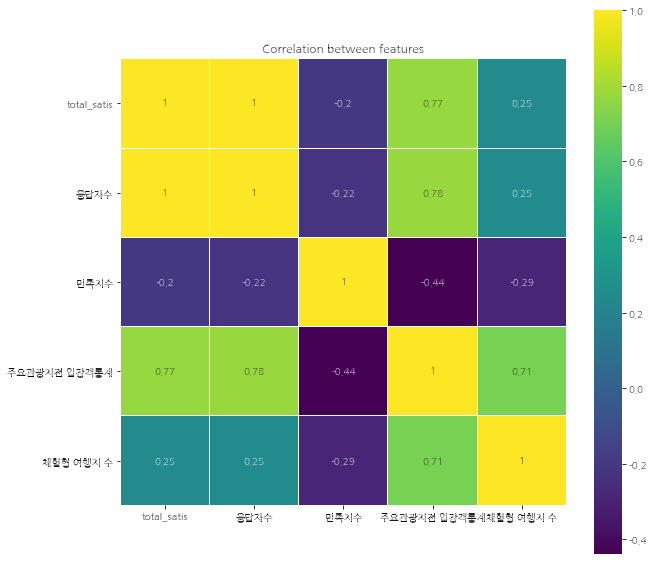

In [ ]:
#히트맵 -> 상관도 시각화
plt.figure(figsize=(10, 10))
sns.heatmap(gu_join_2.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

In [ ]:
#체험 여행지(total_tour) 가 많은 것과 만족도(total_satis)의 상관도는 크지 않다.
#즉, 체험형 여행지가 많다고 만족도가 높은 것은 아님

#그렇다면, 그 안의 컨텐츠가 문제라는 것을 도출할 수 있다.
#컨텐츠 이외에 다른 요소가 될 수도 있음

# Decision Tree를 활용한, '가족단위 지역'별 하고 싶은 '여행지'로 지역고르기

In [ ]:
traveler_2

,1차방문지,여행지선택이유__1순위,여행지선택이유_2순위,여행지선택이유_3순위,여행활동,여행활동_11.지역 축제_이벤트 참가,여행활동_12.교육_체험 프로그램 참가,전반적만족도,재방문의도,타인추천의도,가족수,15세이하 가족수,BAGE(연령),BMON(월별),A7B_1(가족여행),만15세가족
0,경기도,9,1.0,4.0,1.0,NaN,NaN,4,4,4,3,1.0,4,1,1.0,1
1,강원도,5,12.0,NaN,1.0,NaN,NaN,4,4,4,3,0.0,5,1,1.0,1
2,강원도,3,9.0,4.0,NaN,NaN,NaN,4,3,3,3,1.0,4,2,1.0,2
3,강원도,5,8.0,4.0,1.0,NaN,NaN,4,4,4,3,1.0,3,2,1.0,2
4,인천,1,3.0,13.0,1.0,NaN,NaN,4,3,3,1,NaN,3,3,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,강원도,4,9.0,2.0,1.0,11.0,NaN,5,4,4,3,1.0,4,12,1.0,1
1273,서울,2,10.0,NaN,NaN,NaN,NaN,5,5,5,3,1.0,3,4,1.0,1
1274,서울,4,1.0,2.0,NaN,NaN,NaN,5,4,4,4,2.0,3,5,1.0,2
1275,경기도,2,1.0,NaN,1.0,NaN,NaN,5,5,4,4,2.0,3,7,1.0,2


In [ ]:
decision = traveler_2.loc[:, ['1차방문지','여행지선택이유__1순위', 'BMON(월별)']]
# A7A(만15세미만)

In [ ]:
decision = decision.dropna(axis=0) #행 값에 결측치가 있는 것을 DROPA

In [ ]:
decision

,1차방문지,여행지선택이유__1순위,BMON(월별)
0,경기도,9,1
1,강원도,5,1
2,강원도,3,2
3,강원도,5,2
4,인천,1,3
...,...,...,...
1272,강원도,4,12
1273,서울,2,4
1274,서울,4,5
1275,경기도,2,7


In [ ]:
ecision['1차방문지'].value_counts()

경기도     265
경상북도    218
강원도     206
경상남도    173
충청남도     75
전라남도     54
전라북도     47
부산       40
인천       39
제주도      36
울산       33
충청북도     31
서울       26
대전       12
대구        9
광주        7
세종        1
Name: 1차방문지, dtype: int64

In [ ]:
learn_data = decision.loc[:,["여행지선택이유__1순위", "BMON(월별)"]] #학습 : 나이와 연수입에 따라 학습을 시킴

In [ ]:
learn_label = decision.loc[:, '1차방문지'] #정답 : 소비 등급을 맞추어보자

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(learn_data, learn_label, test_size=0.2, train_size=0.8, shuffle=True) #8대2로 섞음

In [ ]:
x_train #학습데이터 = 문제데이터

,여행지선택이유__1순위,BMON(월별)
1013,13,12
920,5,10
936,4,6
306,6,12
1058,6,12
...,...,...
167,4,5
248,2,12
135,1,7
154,4,7


In [ ]:
y_train #학습 정답 데이터

1013    경상북도
920     경상남도
936     경상북도
306     전라남도
1058      부산
        ... 
167      경기도
248     충청남도
135       부산
154       인천
1262     강원도
Name: 1차방문지, Length: 1017, dtype: object

In [ ]:
x_test #검증 데이터(내 검증 데이터)

,여행지선택이유__1순위,BMON(월별)
1047,1,4
842,1,9
461,8,6
781,3,8
192,2,6
...,...,...
31,8,10
441,3,9
500,2,5
1126,2,12


In [ ]:
y_test #내 검증 정답 데이터

1047    경상북도
842     경상북도
461      강원도
781       울산
192      강원도
        ... 
31      전라남도
441      경기도
500      경기도
1126      대구
859     경상북도
Name: 1차방문지, Length: 255, dtype: object

In [ ]:
#의사결정 라이브러리
#머신러닝 학습데이터 -> X_train -> y_train(생존여부) / Decision Treee로 학습화시켜, 0과 1로 살 여부를 맞출 확률이 80%가 나옴.
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=13)
tree_clf.fit(x_train, y_train)

print('Score: {}'.format(tree_clf.score(x_train, y_train)))
#머신러닝이 자체적으로 돌면서 X_train (나이,성별,등급 등 조건으로) -> y_train(0과 1에 대한 결과를 맞출 확률이 80% )

Score: 0.26450344149459193


In [ ]:
#정확도 테스트
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(x_test) #tree_clf 학습 모델 객체안에 X_test라는 내가 빼놓은 데이터를 넣어, y_pred(살 여부를 확인함!)
print("Test Accuracy is ", accuracy_score(y_test, y_pred)*100) #y_test 는 내가 빼놓은 정답 데이터, (y_test / y_pred) * 100 = 

Test Accuracy is  14.901960784313726


**여행자 조건 테스트**

In [ ]:
# 여행자 조건 테스트 : 지역축제 = 11번을 목적으로, 나는 9월달에 여행을 떠날것이다.
jiheon = [11,9]

In [ ]:
tree_clf.predict_proba([jiheon])
#각 인덱스 별로 맞는것을 정확도로 표현

array([[0.08900524, 0.17801047, 0.10994764, 0.22513089, 0.0104712 ,
        0.0104712 , 0.01570681, 0.03141361, 0.02617801, 0.        ,
        0.03664921, 0.05235602, 0.05759162, 0.02617801, 0.03664921,
        0.06282723, 0.03141361]])

In [ ]:
decision['1차방문지'].value_counts()

#각 인덱스에 맞는 확률로 구해줌 ->
#19% 정확도 -> 지역축제를 목적으로, 9월달 여행은 경기도를 추천
#20% 정확도 -> 지역축제를 목적으로, 경

경기도     265
경상북도    218
강원도     206
경상남도    173
충청남도     75
전라남도     54
전라북도     47
부산       40
인천       39
제주도      36
울산       33
충청북도     31
서울       26
대전       12
대구        9
광주        7
세종        1
Name: 1차방문지, dtype: int64

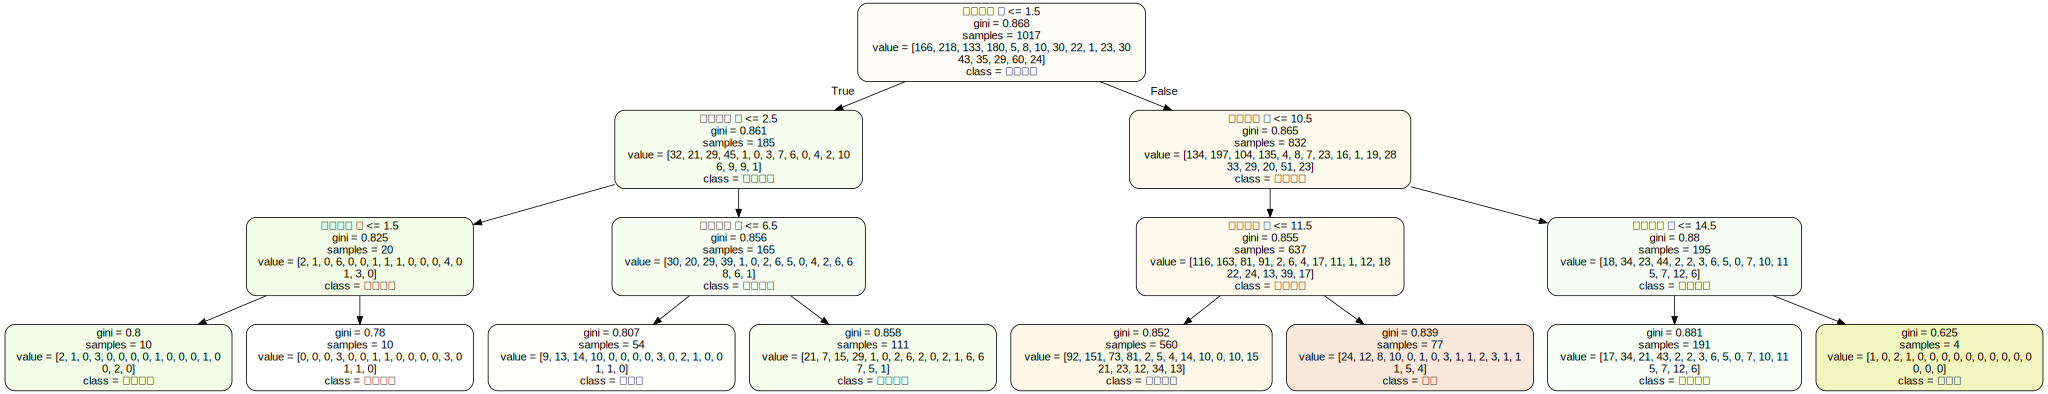

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="tour.dot",
        feature_names=['하고싶은 것', '가고싶은 월'],
        class_names=['경기','경상북도', '강원도', '경상남도', '충청남도', '전라남도', '전라북도', '부산', '인천', '제주도', '울산', '충청북도', '서울', '대전', ],
        rounded=True,
        filled=True
    )

import graphviz
with open("tour.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='hospital', directory='images/decision_trees', cleanup=True)
dot

## 결론 : 언택트 시대에 맞는 지역축제/체험학습을 제안하기 위해서는 광주,대구,대전,충북등을 장려해야함.
## 지역/축제 체험도 만족도는 지역별 별 차이가 없다 11~13로 동일
## 지역안에서 지역축제/체험 학습의 수가 많은 것과 만족도의 차이 또한 없음.
## 소비자데이터(신한카드) 데이터속에서 여행지 선택의 차이를 분별하여야 함.
## Decsion Tree Model : 여행자가 원하는 '컨텐츠(목적)' 과 '월' 로서 본인이 가고 싶은 지역을 선택